In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [99]:
!ls

10km.CSV       21km.CSV       5km.CSV        MEC_Race.ipynb


In [100]:
column_names = ["e", "place", "name", "div", "time", "bib", "d", "c", "b", "a", "pace_km", "pace_miles"]
five =  pd.read_csv("5km.CSV", names=column_names)
ten =  pd.read_csv("10km.CSV", names=column_names)
half =  pd.read_csv("21km.CSV", names=column_names)

In [101]:
# Implementation of the Arduino map function, b/c I guess it doesn't exist in python
def map(x, in_min, in_max, out_min, out_max):
    return round((x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)

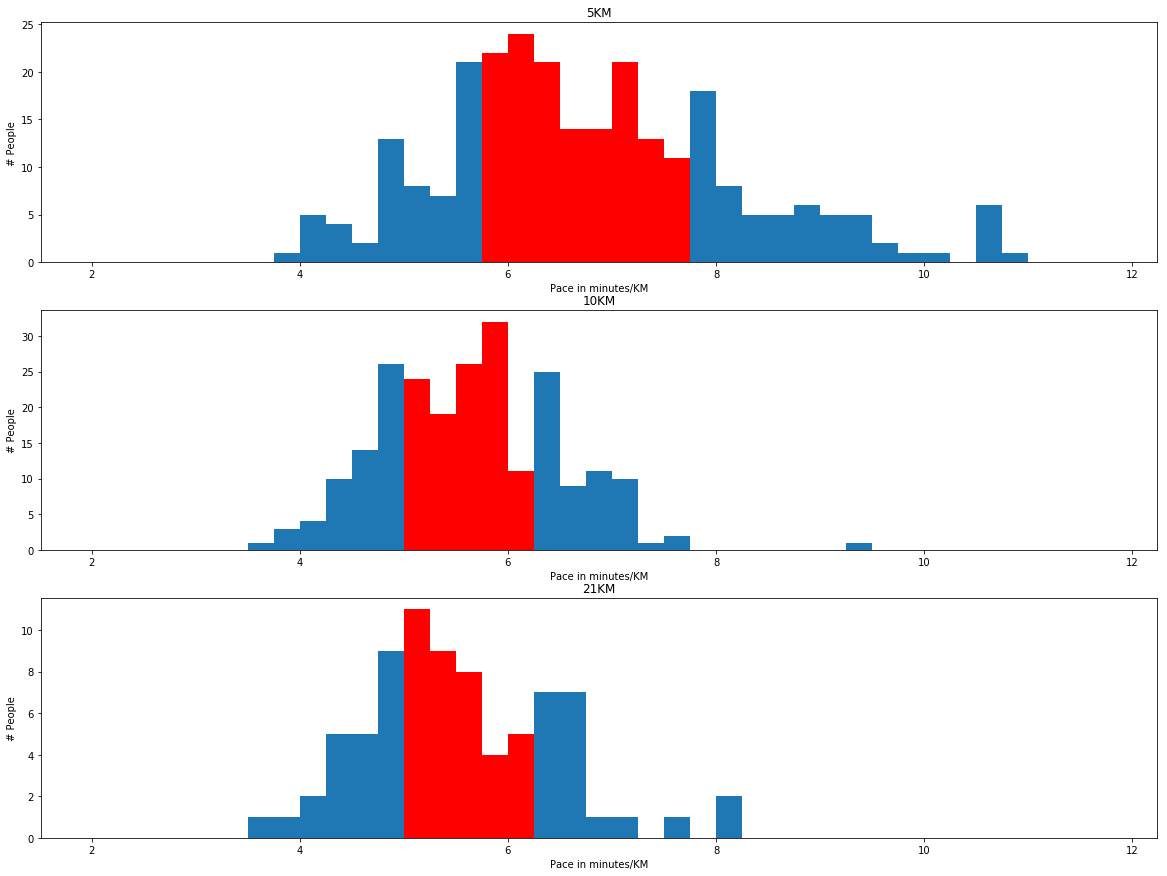

In [102]:
races = [five, ten, half]
races_str = ["5KM", "10KM", "21KM"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))
ax0, ax1, ax2 = axes.flatten()
axes_arr = [ax0, ax1, ax2]

for race, race_str, ax in zip(races, races_str, axes_arr):
    new = race["pace_km"].str.split(":", n = 1, expand = True)
    new.columns = ["m", "s"]
    new.s = pd.to_numeric(new.s)
    new.m = pd.to_numeric(new.m)
    race["pace_s"] = new.m * 60 + new.s
    race["pace_m"] = race.pace_s / 60.0
    n, bins, patches = ax.hist(race["pace_m"].values, bins=np.arange(2,12,0.25))
    perc_25 = race["pace_m"].quantile(0.25)
    perc_25 = map(perc_25, 2, 12, 0, 40)
    perc_75 = race["pace_m"].quantile(0.75)
    perc_75 = map(perc_75, 2, 12, 0, 40)
#     print(perc_25)
    for patch in patches[perc_25: perc_75]:
        patch.set_fc('r')
#     print(perc_25, perc_75, map(perc_25, 2, 12, 0, 40), map(perc_75, 2, 12, 0, 40))
#     map(perc_25, 2, 12, 0, 40)
    ax.set_title(race_str)
    ax.set_ylabel("# People")
    ax.set_xlabel("Pace in minutes/KM")

plt.show()